In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vertex_model_ab import VertexModelApicoBasal
from vertex_model_2d import VertexModel
from voronoi_cells import random_voronoi_cells

In [94]:
def curvature_scan(size, curvatures):
    #generate a random voronoi tesselation, relax it over multiple curvatures
    #return the results of these simulations
    locs,adjs = random_voronoi_cells(size)
    ars = []
    ardegs = []
    brs = []
    brdegs = []
    srs = []
    srdegs = []
    for k in curvatures:
        vm = VertexModelApicoBasal(locs,adjs,k=k,h=2,A0=1,r=1,s=1)
        vm.gradient_descent_with_t1(0.001,0.001,0.05*1./size)
        vm.show_model()
        print 'curvature:',k
        ar,br,sr = vm.classify_rosettes(0.05*1./size)
        ars += [ar]
        ardegs += [[vm.apical_vm.rosette_degree(r) for r in ar]]
        brs += [br]
        brdegs += [[vm.basal_vm.rosette_degree(r) for r in br]]
        srs += [sr]
        srdegs += [[vm.apical_vm.rosette_degree(r) for r in sr]]
    return ars, ardegs, brs, brdegs, srs, srdegs

In [95]:
def curvature_trial(size,curvatures, n_trials):
    ars = {}
    ardegs = {}
    brs = {}
    brdegs = {}
    srs = {}
    srdegs = {}
    for k in curvatures:
        ars[k] = []
        ardegs[k] = []
        brs[k] = []
        brdegs[k] = []
        srs[k] = []
        srdegs[k] = []
    for trial in range(n_trials):
        print 'trial:',trial
        ar, ardeg, br, brdeg, sr, srdeg = curvature_scan(size,curvatures)
        for i in range(len(curvatures)):
            k = curvatures[i]
            ars[k] += [ar[i]]
            ardegs[k] += [ardeg[i]]
            brs[k] += [br[i]]
            brdegs[k] += [brdeg[i]]
            srs[k] += [sr[i]]
            srdegs[k] += [srdeg[i]]
    return ars, ardegs, brs, brdegs,srs, srdegs

In [96]:
def plot_stuff(rosettes,title):
    means = []
    curvatures = sorted(rosettes.keys())
    for k in curvatures:
        nums = map(len,rosettes[k])
        means += [np.mean(nums)]
        kval = [k]*len(nums)
        plt.scatter(kval,nums,color='k')
    plt.plot(curvatures, means,color='b')
    plt.title(title)
    plt.xlabel('curvature')
    plt.ylabel('number of rosettes')
    plt.show()
def plot_all_stuff(ars, ardegs, brs, brdegs,srs, srdegs):
    plot_stuff(ars,'Apical-only rosettes')
    plot_stuff(brs,'Basal-only rosettes')
    plot_stuff(srs,'Rosettes on both poles')

In [97]:
ars, ardegs, brs, brdegs, srs, srdegs = curvature_trial(5,[0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4],3)

trial: 0


KeyboardInterrupt: 

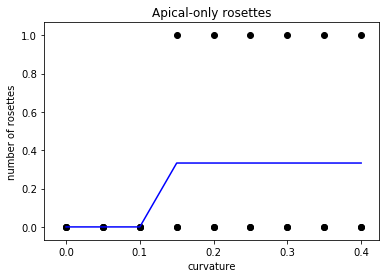

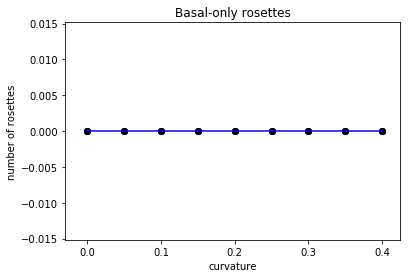

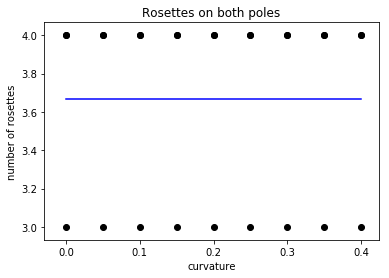

In [80]:
plot_all_stuff(ars, ardegs, brs, brdegs, srs, srdegs)